In [1]:
import numpy as np
import numpy as np
import pandas as pd
import loadData
import monteCarloClass
import time

In [2]:
# Publication-ready plot configuration
import matplotlib.pyplot as plt
import matplotlib as mpl

# Font sizes
FONT_SIZE_LABEL = 18  # Axis labels and tick labels
FONT_SIZE_TITLE = 20  # Plot titles
FONT_SIZE_LEGEND = 18  # Legend text

# Configure matplotlib parameters globally
plt.rcParams.update({
    # Font sizes
    'font.size': FONT_SIZE_LABEL,          # Base font size
    'axes.labelsize': FONT_SIZE_LABEL,     # X and Y axis labels
    'axes.titlesize': FONT_SIZE_TITLE,     # Subplot titles
    'xtick.labelsize': FONT_SIZE_LABEL,    # X tick labels
    'ytick.labelsize': FONT_SIZE_LABEL,    # Y tick labels
    'legend.fontsize': FONT_SIZE_LEGEND,   # Legend
    
    # Font family
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    
    # Line widths
    'axes.linewidth': 1.5,                 # Axis border width
    'grid.linewidth': 1.0,                 # Grid line width
    'lines.linewidth': 2.0,                # Plot line width
    'lines.markersize': 8,                 # Default marker size
    
    # Tick parameters
    'xtick.major.width': 1.5,              # X tick width
    'ytick.major.width': 1.5,              # Y tick width
    'xtick.major.size': 6,                 # X tick length
    'ytick.major.size': 6,                 # Y tick length
    
    # Legend
    'legend.frameon': True,                # Legend frame
    'legend.framealpha': 0.8,              # Legend transparency
    'legend.edgecolor': 'black',           # Legend border color
    
    # Figure
    'figure.dpi': 100,                     # Display resolution
    'savefig.dpi': 300,                    # Save resolution for publication
    'savefig.bbox': 'tight',               # Tight bounding box
    'savefig.pad_inches': 0.1,             # Padding when saving
    
    # Grid
    'axes.grid': False,                    # No grid by default
    'grid.alpha': 0.3,                     # Grid transparency if enabled
})

print("✓ Publication-ready plot configuration loaded")
print(f"  - Axis labels/ticks: {FONT_SIZE_LABEL}pt")
print(f"  - Titles: {FONT_SIZE_TITLE}pt")
print(f"  - Save resolution: 300 DPI")

✓ Publication-ready plot configuration loaded
  - Axis labels/ticks: 18pt
  - Titles: 20pt
  - Save resolution: 300 DPI


load models


In [3]:
import os
import json
import glob
import pandas as pd
from pathlib import Path

def load_all_model_results():
    """Load all model fit results from the model_fits directory"""
    results = []
    
    # Find all JSON files in model_fits directory
    json_files = glob.glob("model_fits/**/*.json", recursive=True)



    
    
    for file_path in json_files:
  
        try:
            with open(file_path, 'r') as f:
                result = json.load(f)
            
            # Extract participant ID and model type from filename if not in data
            filename = os.path.basename(file_path)
            parts = filename.replace('.json', '').split('_')
            #print(parts)
            if 'participantID' not in result:
                result['participantID'] = parts[0]

            
            result['modelType'] = parts[1]+"_"+parts[3]
            
            if parts[2]!="LapseFree":
                #print("Lapse fixed model, skipping")
                continue

            # Skip results with specific model types
            excluded_models = ["gaussian_sharedPrior", "fusionOnly_sharedPrior", "probabilityMatching_sharedPrior", "switching_sharedPrior"]
            if any(model in result['modelType'] for model in excluded_models):
                # Skip this result
                os.remove(file_path)
                continue
            

            results.append(result)
            
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    return results

# Load all results
all_results = load_all_model_results()
print(f"Loaded {len(all_results)} model fit results")

# Convert to DataFrame for easier analysis
df_results = pd.DataFrame(all_results)
print(f"Participants: {sorted(df_results['participantID'].unique())}")
print(f"Models: {sorted(df_results['modelType'].unique())}\n number of models in comparison is: {len(df_results['modelType'].unique())} ")


Loaded 78 model fit results
Participants: ['all', 'as', 'dt', 'hh', 'ip', 'ln1', 'ln2', 'mh', 'ml', 'mt', 'oy', 'qs', 'sx']
Models: ['fusionOnlyLogNorm_sharedPrior', 'logLinearMismatch_sharedPrior', 'lognorm_sharedPrior', 'probabilityMatchingLogNorm_sharedPrior', 'selection_sharedPrior', 'switchingFree_sharedPrior']
 number of models in comparison is: 6 


In [4]:

participantIds=sorted(df_results['participantID'].unique())
modelTypes=sorted(df_results['modelType'].unique())
nParticipants=len(participantIds)
nModels=len(modelTypes)

import fitSaver
import os
participantID="as"
modelType="fusionOnlyLogNorm"

# simulate



 Load data

In [5]:
# import bootstrapperSaveLoad functions
import matplotlib.pyplot as plt
from bootstrapperSaveLoad import saveBootstrappedParams, loadBootstrappedParams
import loadResults
import os
import json
import seaborn as sns

# parameter recovery

In [13]:
# Load Parameter Recovery Results from JSON files
import numpy as np
import pandas as pd
import json
import os
from glob import glob

def load_recovery_results(base_dir="parameter_recovery_results", modelType="lognorm"):
    """
    Load parameter recovery results from saved JSON files.
    
    Args:
        base_dir: directory containing the recovery results
        modelType: the model type to load results for
    
    Returns:
        List of recovery result dictionaries
    """
    recovery_results = []
    
    # Find all recovery JSON files
    pattern = os.path.join(base_dir, "*", f"*_{modelType}_recovery.json")
    json_files = glob(pattern)
    
    print(f"Found {len(json_files)} recovery result files")
    
    for json_file in sorted(json_files):
        try:
            with open(json_file, 'r') as f:
                result = json.load(f)
            recovery_results.append(result)
            participantID = result.get('participantID', 'unknown')
            n_successful = result.get('n_successful', 0)
            print(f"Loaded {participantID}: {n_successful} successful recoveries")
        except Exception as e:
            print(f"Error loading {json_file}: {e}")
    
    return recovery_results

# Load the recovery results
recovery_results = load_recovery_results(modelType="lognorm")

print(f"\nTotal participants with recovery results: {len(recovery_results)}")

# Display summary
if recovery_results:
    print("\nSummary:")
    for result in recovery_results:
        pid = result['participantID']
        true_p = np.array(result['true_params'])
        recovered_p = np.array(result['recovered_params_mean'])
        print(f"{pid}: True params: {np.round(true_p, 3)}, Recovered (mean): {np.round(recovered_p, 3)}")

Found 11 recovery result files
Loaded as: 50 successful recoveries
Loaded dt: 50 successful recoveries
Loaded hh: 50 successful recoveries
Loaded ip: 50 successful recoveries
Loaded ln2: 50 successful recoveries
Loaded mh: 50 successful recoveries
Loaded ml: 50 successful recoveries
Loaded mt: 50 successful recoveries
Loaded oy: 50 successful recoveries
Loaded qs: 50 successful recoveries
Loaded sx: 50 successful recoveries

Total participants with recovery results: 11

Summary:
as: True params: [0.052 0.229 0.5   0.647 0.596 0.096 0.02 ], Recovered (mean): [0.076 0.257 0.52  0.66  0.624 0.113 0.044]
dt: True params: [0.3   0.198 0.306 0.565 0.527 0.23  0.219], Recovered (mean): [0.234 0.241 0.439 0.621 0.709 0.161 0.167]
hh: True params: [1.00e-03 1.09e-01 2.49e-01 9.56e-01 1.43e+00 3.60e-02 5.90e-02], Recovered (mean): [0.028 0.105 0.208 0.91  1.776 0.07  0.069]
ip: True params: [0.133 0.251 0.814 0.171 0.807 0.089 0.011], Recovered (mean): [0.148 0.246 1.686 0.535 0.819 0.094 0.051]

In [15]:
# Run Parameter Recovery Analysis
import numpy as np
from tqdm import tqdm

def run_parameter_recovery(participantIds, modelType="lognorm", n_recovery=50, nSimul=500, nStarts=1,
                           save_dir="parameter_recovery_results"):
    """
    Parameter Recovery Analysis:
    For each participant:
      1. Load their fitted parameters (ground truth)
      2. Simulate synthetic datasets using those parameters
      3. Re-fit the model to each synthetic dataset
      4. Compare recovered parameters to ground truth
    
    Args:
        participantIds: list of participant IDs to run recovery for
        modelType: model name (e.g., 'lognorm', 'fusionOnlyLogNorm')
        n_recovery: number of recovery iterations per participant
        nSimul: Monte Carlo simulations for fitting
        nStarts: optimization starting points
        save_dir: directory to save results
    
    Returns:
        List of recovery results with true params, recovered params, and statistics
    """
    all_recovery_results = []
    
    for participantID in tqdm(participantIds, desc="Parameter Recovery"):
        # Check if results already exist
        participant_dir = os.path.join(save_dir, participantID)
        result_path = os.path.join(participant_dir, f"{participantID}_{modelType}_recovery.json")
        
        if os.path.exists(result_path):
            print(f"Loading existing results for {participantID}")
            with open(result_path, 'r') as f:
                existing_result = json.load(f)
            all_recovery_results.append(existing_result)
            continue
        
        # Load original data and fitted parameters
        data, dataName = loadData.loadData(participantID + "_all.csv", verbose=False)
        
        mc_original = monteCarloClass.OmerMonteCarlo(data)
        mc_original.modelName = modelType
        mc_original.freeP_c = False
        mc_original.sharedLambda = False
        mc_original.dataName = dataName
        mc_original.nSimul = nSimul
        mc_original.nStart = nStarts
        
        try:
            res = loadResults.loadFitResults(mc_original, dataName, modelName=modelType)
            true_params = np.array(res['fittedParams'])
        except Exception as e:
            print(f"Could not load {modelType} results for {participantID}: {e}")
            continue
        
        # Run recovery iterations
        recovered_params_list = []
        
        for iter_idx in tqdm(range(n_recovery), desc=f"  {participantID}", leave=False):
            # Simulate data from true parameters
            sim_data = mc_original.simulateMonteCarloData(true_params, data)
            
            # Create fitter for simulated data
            mc_recovery = monteCarloClass.OmerMonteCarlo(sim_data)
            mc_recovery.modelName = modelType
            mc_recovery.freeP_c = False
            mc_recovery.sharedLambda = False
            mc_recovery.nSimul = nSimul
            mc_recovery.nStart = nStarts
            mc_recovery.optimizationMethod = 'scipy'
            mc_recovery.dataName = f"{participantID}_recovery_{iter_idx}"
            
            try:
                # Fit model to recover parameters
                recovered_params = mc_recovery.fitCausalInferenceMonteCarlo(mc_recovery.groupedData)
                if recovered_params is not None:
                    recovered_params_list.append(recovered_params)
            except Exception as e:
                print(f"  Recovery iteration {iter_idx} failed: {e}")
                continue
        
        if len(recovered_params_list) > 0:
            recovered_params_array = np.array(recovered_params_list)
            
            # Calculate statistics
            result = {
                'participantID': participantID,
                'modelType': modelType,
                'true_params': true_params.tolist(),
                'recovered_params_mean': np.mean(recovered_params_array, axis=0).tolist(),
                'recovered_params_std': np.std(recovered_params_array, axis=0).tolist(),
                'recovered_params_median': np.median(recovered_params_array, axis=0).tolist(),
                'n_successful': len(recovered_params_list),
                'n_attempted': n_recovery,
                'all_recovered_params': recovered_params_array.tolist()
            }
            
            all_recovery_results.append(result)
            
            # Save results
            os.makedirs(participant_dir, exist_ok=True)
            with open(result_path, 'w') as f:
                json.dump(result, f, indent=2)
            
            print(f"✓ {participantID}: {len(recovered_params_list)}/{n_recovery} successful recoveries")
            bias = np.mean(recovered_params_array - true_params, axis=0)
            print(f"  Mean bias: {np.round(bias, 4)}")
        else:
            print(f"✗ {participantID}: No successful recoveries")
    
    return all_recovery_results

# # Example: Run parameter recovery for all participants
# # Uncomment and run when ready:
# recovery_results = run_parameter_recovery(
#     participantIds[1:],
#     modelType="lognorm",
#     n_recovery=50,  # 50 iterations recommended for publication
#     nSimul=500,
#     nStarts=1
# )

Styled output unavailable (jinja2 missing). Falling back to text table.
Parameter  Mean Corr  Mean Bias     RMSE  Mean SE
       λ₁   0.960254   0.014100 0.031092 0.046896
      σ_a   0.926799   0.027859 0.059629 0.089386
      σ_v   0.920353   0.159777 0.317722 0.284571
      p_c   0.623746  -0.037585 0.174721 0.179479
     σ_a2   0.968555   0.143660 0.222570 0.236824
       λ₂   0.949373   0.014288 0.034309 0.048911
       λ₃   0.972060   0.007270 0.026286 0.044228

Mean diagonal correlation: 0.903
Mean RMSE: 0.124


,Parameter,Mean Corr,Mean Bias,RMSE,Mean SE
0,λ₁,0.960254,0.014100,0.031092,0.046896
1,σ_a,0.926799,0.027859,0.059629,0.089386
2,σ_v,0.920353,0.159777,0.317722,0.284571
3,p_c,0.623746,-0.037585,0.174721,0.179479
4,σ_a2,0.968555,0.143660,0.222570,0.236824
5,λ₂,0.949373,0.014288,0.034309,0.048911
6,λ₃,0.972060,0.007270,0.026286,0.044228


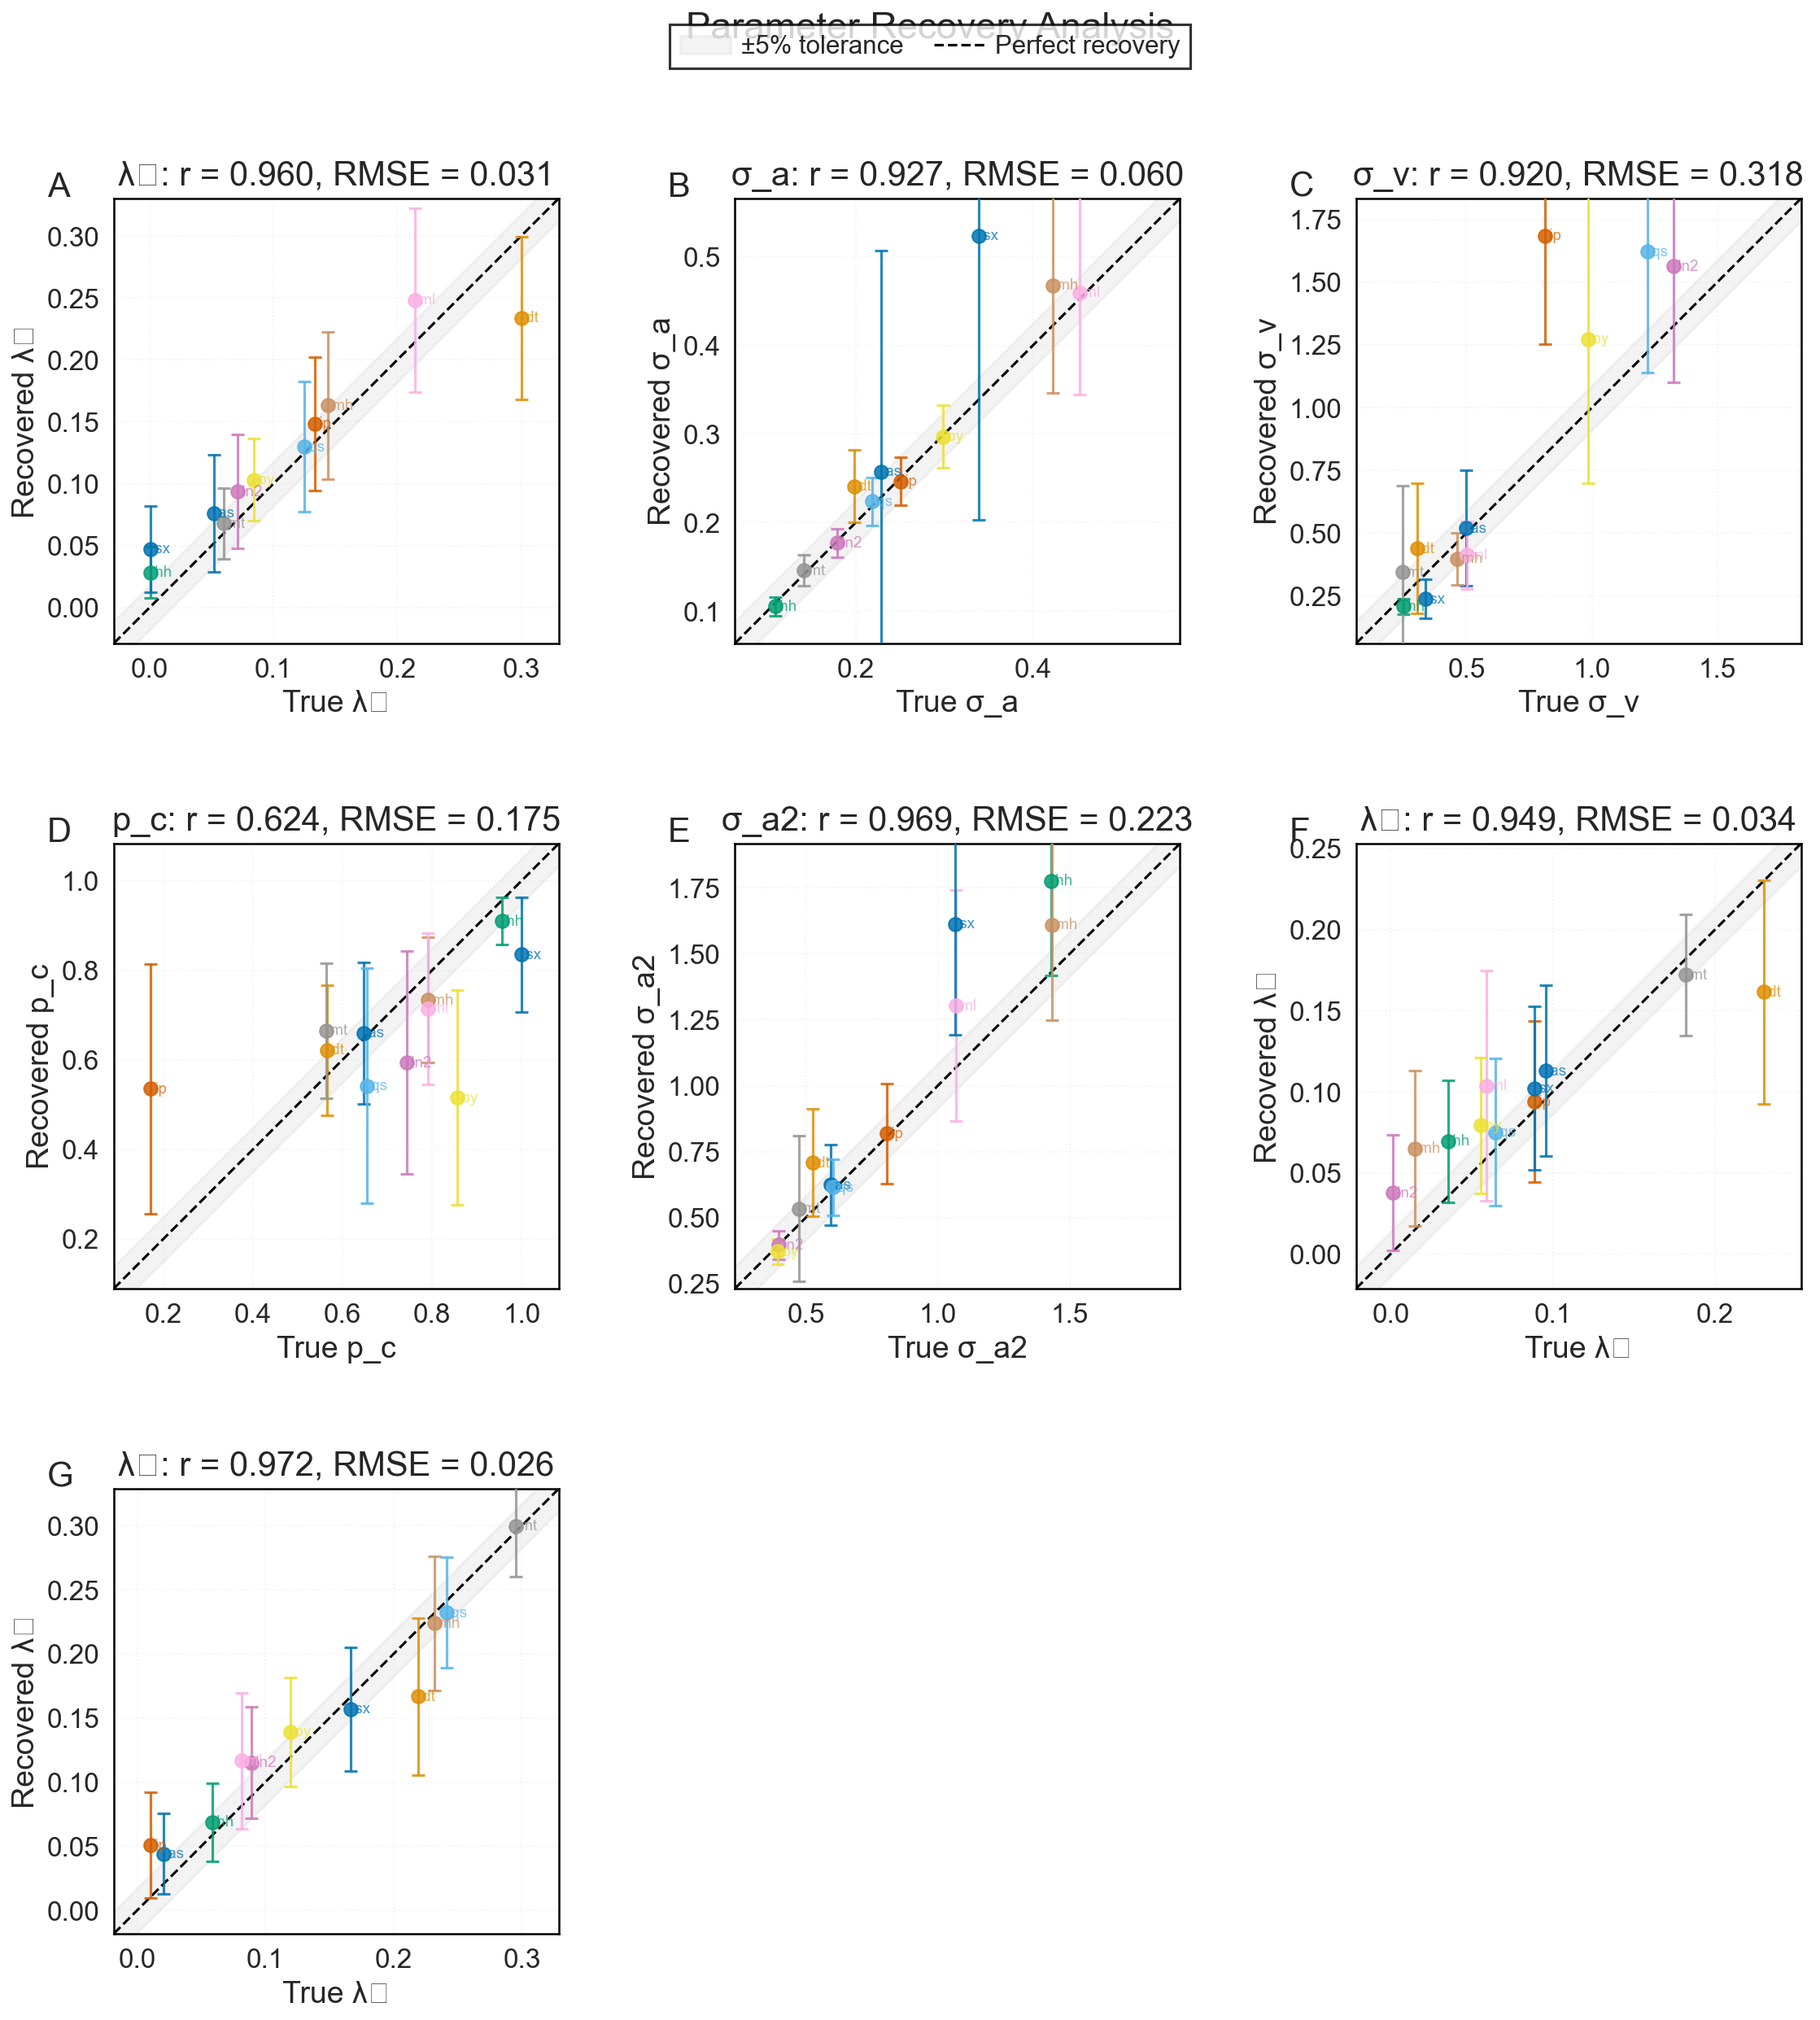

In [ ]:
# Plot Parameter Recovery Results
import math
from IPython.display import display
import seaborn as sns
sns.set_theme(context="talk", style="whitegrid")

def safe_display_df(df, fmt=None, gradient_subset=None, cmap="Blues"):
    """Gracefully show styled tables when jinja2 is available."""
    try:
        import jinja2  # noqa: F401
        styler = df.style
        if fmt:
            styler = styler.format(fmt)
        if gradient_subset:
            styler = styler.background_gradient(cmap=cmap, subset=gradient_subset)
        display(styler)
    except Exception:
        print("Styled output unavailable (jinja2 missing). Falling back to text table.")
        print(df.to_string(index=False))


def plot_parameter_recovery(recovery_results, param_names=None, annotate_points=True, save_path=None):
    """
    Visualize parameter recovery with publication-ready aesthetics.

    Args:
        recovery_results: List of dictionaries produced by the recovery pipeline.
        param_names: Optional list of parameter labels matching the fitted model.
        annotate_points: Whether to label each point with its participant ID.
        save_path: Optional filepath (without extension) to save the generated figures.
    """
    if not recovery_results:
        print("No recovery results available to plot.")
        return None

    if param_names is None:
        param_names = ['λ_1', 'σ_a', 'σ_v', 'p_c', 'σ_a2', 'λ_2', 'λ_3']

    n_params = len(recovery_results[0]['true_params'])
    participants = [r['participantID'] for r in recovery_results]

    # Use colorblind-friendly palette
    palette = sns.color_palette("colorblind", len(participants))

    n_cols = min(3, n_params)
    n_rows = math.ceil(n_params / n_cols)

    # Journal-ready figure size: slightly larger panels to avoid overlap
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6.0 * n_cols, 6 * n_rows), 
                             squeeze=False, dpi=150)
    axes = axes.flatten()

    summary_rows = []

    # Panel labels for multi-panel figures
    panel_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

    for p_idx in range(n_params):
        ax = axes[p_idx]
        param_label = param_names[p_idx] if p_idx < len(param_names) else f'Param {p_idx+1}'
        true_vals = np.array([r['true_params'][p_idx] for r in recovery_results], dtype=float)
        recovered_vals = np.array([r['recovered_params_mean'][p_idx] for r in recovery_results], dtype=float)
        recovered_stds = np.array([r['recovered_params_std'][p_idx] for r in recovery_results], dtype=float)

        all_vals = np.concatenate([true_vals, recovered_vals])
        span = all_vals.max() - all_vals.min()
        padding = 0.1 * span if span > 0 else 0.5
        lower, upper = all_vals.min() - padding, all_vals.max() + padding
        diag_x = np.linspace(lower, upper, 200)
        tolerance = 0.05 * (upper - lower)

        # Tolerance band with subtle styling
        ax.fill_between(diag_x, diag_x - tolerance, diag_x + tolerance, 
                        color='lightgray', alpha=0.25, 
                        label='±5% tolerance' if p_idx == 0 else None, 
                        zorder=1)

        # Unity line with clear contrast
        ax.plot([lower, upper], [lower, upper], 
                color='black', linestyle='--', linewidth=1.5, 
                label='Perfect recovery' if p_idx == 0 else None, 
                zorder=2)

        # Plot data points with error bars
        for idx, participant in enumerate(participants):
            color = palette[idx]
            ax.errorbar(true_vals[idx], recovered_vals[idx], yerr=recovered_stds[idx], 
                       fmt='o', color=color, ecolor=color, 
                       elinewidth=1.5, capsize=4, capthick=1.5,
                       markersize=8, alpha=0.85, zorder=3)
            if annotate_points:
                # offset text a bit to reduce overlap
                ax.text(true_vals[idx], recovered_vals[idx], f" {participant}", 
                       fontsize=9, color=color, alpha=0.75, 
                       va='center', ha='left', zorder=4)

        # Calculate statistics
        corr = np.corrcoef(true_vals, recovered_vals)[0, 1] if len(true_vals) > 1 else np.nan
        bias = np.mean(recovered_vals - true_vals)
        rmse = np.sqrt(np.mean((recovered_vals - true_vals) ** 2))

        # Axis labels with proper formatting (regular weight)
        ax.set_xlabel(f'True {param_label}', fontsize=FONT_SIZE_LABEL)
        ax.set_ylabel(f'Recovered {param_label}', fontsize=FONT_SIZE_LABEL)

        # Title with statistics (regular weight)
        ax.set_title(f'{param_label}: r = {corr:.3f}, RMSE = {rmse:.3f}', 
                    fontsize=FONT_SIZE_TITLE, pad=8)

        # Add panel label (regular weight, smaller)
        if p_idx < len(panel_labels):
            ax.text(-0.15, 1.06, panel_labels[p_idx], transform=ax.transAxes,
                   fontsize=FONT_SIZE_TITLE, va='top')

        ax.set_xlim(lower, upper)
        ax.set_ylim(lower, upper)
        ax.set_box_aspect(1)

        # Clean grid styling
        ax.grid(True, which='major', alpha=0.25, linewidth=0.8, linestyle=':')
        ax.set_axisbelow(True)

        # Spine styling
        for spine in ax.spines.values():
            spine.set_linewidth(1.2)
            spine.set_color('black')

        # Tick parameters
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_LABEL-2, 
                      width=1.2, length=5, direction='out')

        summary_rows.append({
            'Parameter': param_label,
            'Mean Corr': corr,
            'Mean Bias': bias,
            'RMSE': rmse,
            'Mean SE': np.mean(recovered_stds)
        })

    # Hide unused subplots
    for remaining_ax in axes[n_params:]:
        remaining_ax.axis('off')

    # Create legend with clean styling
    handles, labels = axes[0].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='upper center', 
                  bbox_to_anchor=(0.5, 0.985),
                  ncol=len(handles), frameon=True, 
                  fontsize=FONT_SIZE_LEGEND-3, 
                  edgecolor='black', fancybox=False,
                  columnspacing=1.2, handletextpad=0.4)

    # Main title (regular weight)
    fig.suptitle('Parameter Recovery Analysis', 
                fontsize=FONT_SIZE_TITLE + 2, y=0.985)

    # Adjust layout to prevent overlap; increase spacing between subplots
    fig.subplots_adjust(top=0.90, hspace=0.45, wspace=0.35)

    # Save with high quality
    if save_path:
        fig.savefig(f"{save_path}_scatter.png", dpi=600, bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
        fig.savefig(f"{save_path}_scatter.pdf", bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
        print(f"Saved: {save_path}_scatter.png (600 DPI) and {save_path}_scatter.pdf")

    # Display summary table
    summary_df = pd.DataFrame(summary_rows)
    column_formats = {'Mean Corr': "{:.3f}", 'Mean Bias': "{:.3f}", 'RMSE': "{:.3f}", 'Mean SE': "{:.3f}"}
    safe_display_df(summary_df, fmt=column_formats, gradient_subset=['Mean Corr'], cmap="Blues")
    print("\nMean diagonal correlation:", summary_df['Mean Corr'].mean().round(3))
    print(f"Mean RMSE: {summary_df['RMSE'].mean():.3f}")

    return summary_df

# Uncomment to plot after running recovery
plot_parameter_recovery(recovery_results)


# Bootstrap analysis

In [11]:
# Bootstrap Analysis for Parameter Uncertainty - FIXED VERSION
# This gives us confidence intervals for fitted parameters
import numpy as np
from tqdm import tqdm
def run_bootstrap_analysis(participantIds, modelType="lognorm", n_boot=50, nSimul_boot=300, maxiter=200):
    """
    Parametric bootstrap for parameter uncertainty estimation.
    For each participant:
    1. Simulate datasets from fitted parameters
    2. Re-fit each simulated dataset (with proper optimization)
    3. Compute CI from distribution of recovered parameters
    
    KEY FIX: We need to:
    - Add noise to starting point to avoid getting stuck at the same optimum
    - Use more iterations
    - Potentially use random restarts
    """
    from scipy.optimize import minimize
    
    bootstrap_results = []
    
    for participantID in tqdm(participantIds, desc="Bootstrap Analysis"):
        # Load data and fitted parameters
        data, dataName = loadData.loadData(participantID + "_all.csv", verbose=False)
        mc_fitter = monteCarloClass.OmerMonteCarlo(data)
        mc_fitter.modelName = modelType
        mc_fitter.freeP_c = False
        mc_fitter.sharedLambda = False
        mc_fitter.dataName = dataName
        mc_fitter.nSimul = nSimul_boot
        
        try:
            res = loadResults.loadFitResults(mc_fitter, dataName, modelName=mc_fitter.modelName)
            best_params = np.array(res['fittedParams'])
            mc_fitter.modelFit = best_params
        except Exception as e:
            print(f"Could not load results for {participantID}: {e}")
            continue
        
        boot_samples = []
        
        for b in tqdm(range(n_boot), desc=f"  Bootstrap {participantID}", leave=False):
            # Simulate data using fitted parameters
            sim_df = mc_fitter.simulateMonteCarloData(best_params, mc_fitter.data)
            
            # Create fitter for bootstrap dataset
            boot_fitter = monteCarloClass.OmerMonteCarlo(sim_df)
            boot_fitter.modelName = modelType
            boot_fitter.freeP_c = False
            boot_fitter.sharedLambda = False
            boot_fitter.nSimul = nSimul_boot
            boot_fitter.nStart = 1
            boot_fitter.optimizationMethod = 'scipy'
            
            # FIT THE MODEL PROPERLY (not just minimize from best_params)
            # This will use proper bounds and optimization
            try:
                boot_params = boot_fitter.fitCausalInferenceMonteCarlo(boot_fitter.groupedData)
                if boot_params is not None:
                    boot_samples.append(boot_params)
            except Exception as e:
                print(f"  Bootstrap {b} failed: {e}")
                continue
        
        if len(boot_samples) > 0:
            boot_samples = np.array(boot_samples)
            
            # Calculate statistics
            ci_low = np.percentile(boot_samples, 2.5, axis=0)
            ci_high = np.percentile(boot_samples, 97.5, axis=0)
            
            bootstrap_results.append({
                'participantID': participantID,
                'best_params': best_params.tolist(),
                'boot_mean': np.mean(boot_samples, axis=0).tolist(),
                'boot_std': np.std(boot_samples, axis=0).tolist(),
                'ci_low': ci_low.tolist(),
                'ci_high': ci_high.tolist(),
                'n_successful': len(boot_samples),
                'boot_samples': boot_samples.tolist()
            })
            
            print(f"\n{participantID} bootstrap variance: {np.round(np.std(boot_samples, axis=0), 4)}")
            
            # Save individual bootstrap results
            save_dir = os.path.join("bootstrap_results", participantID)
            os.makedirs(save_dir, exist_ok=True)
            save_path = os.path.join(save_dir, f"{participantID}_{modelType}_bootstrap.json")
            with open(save_path, 'w') as f:
                json.dump(bootstrap_results[-1], f, indent=2)
            print(f"Saved bootstrap results for {participantID}")
    
    return bootstrap_results

# Run bootstrap - REDUCED n_boot for testing (increase for final analysis)
# This will take longer but give proper uncertainty estimates
bootstrap_results = run_bootstrap_analysis(
    participantIds[1:3],  # Start with just 2 participants to test
    modelType="lognorm", 
    n_boot=10,  # Reduced for testing - use 50-100 for publication
    nSimul_boot=300
)

Bootstrap Analysis:   0%|          | 0/2 [00:00<?, ?it/s]

Data bounds: t_min=0.021, t_max=0.954
=== DEBUGGING FITTING COMPONENTS ===
Data bounds: t_min=0.021, t_max=0.954
Grouped data shape: (419, 11)
Configuration: sharedLambda=False, freeP_c=False
Model: lognorm
Expected parameter length: 7
Test params length: 7, values: [0.1 0.5 0.5 0.5 0.8 0.1 0.1]
✓ Parameter extraction tested for 3 conditions
Test likelihood: 3474.5285649715875
=== ALL COMPONENTS TESTED SUCCESSFULLY ===
Fitting with shared p_c parameter across SNR conditions.
Bounds shape: (7, 2)
Using fixed t_min=0.021, t_max=0.954 from data
Testing likelihood function with reasonable parameters...
Test likelihood evaluation: 3471.443867479447

Starting 1 optimization attempts using 'scipy'...
Model is lognorm



Bootstrap Analysis:   0%|          | 0/2 [00:09<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Inspect bootstrap results structure
if bootstrap_results:
    print(f"Number of participants: {len(bootstrap_results)}")
    for r in bootstrap_results[:2]:  # Check first 2 participants
        print(f"\nParticipant: {r['participantID']}")
        print(f"  Best params: {np.round(r['best_params'], 4)}")
        print(f"  Boot mean:   {np.round(r['boot_mean'], 4)}")
        print(f"  Boot std:    {np.round(r['boot_std'], 4)}")
        print(f"  CI low:      {np.round(r['ci_low'], 4)}")
        print(f"  CI high:     {np.round(r['ci_high'], 4)}")
        print(f"  N successful: {r['n_successful']}")
        
        # Check if all boot_samples are the same
        boot_samples = np.array(r['boot_samples'])
        print(f"  Boot samples shape: {boot_samples.shape}")
        print(f"  Boot samples variance per param: {np.var(boot_samples, axis=0)}")
        
        # Check first few boot samples
        print(f"  First 3 boot samples:")
        for i in range(min(3, len(boot_samples))):
            print(f"    Sample {i}: {np.round(boot_samples[i], 4)}")

In [ ]:
# Plot Bootstrap Results
import math
from IPython.display import display

def plot_bootstrap_results(bootstrap_results, param_names=None, highlight_participant=None, save_prefix=None):
    """
    Publication-ready visualization for bootstrap parameter uncertainty.

    Args:
        bootstrap_results: Output from run_bootstrap_analysis.
        param_names: Optional list of parameter labels.
        highlight_participant: Participant ID to showcase in distribution plots.
        save_prefix: Optional filepath prefix for saving figures (PNG at 300 DPI).
    """
    if not bootstrap_results:
        print("No bootstrap results available to visualize.")
        return None

    if param_names is None:
        param_names = ['λ₁', 'σ_a', 'σ_v', 'p_c', 'σ_a2', 'λ₂', 'λ₃']

    sns.set_theme(context="talk", style="whitegrid")
    n_params = len(bootstrap_results[0]['best_params'])
    participants = [r['participantID'] for r in bootstrap_results]
    palette = sns.color_palette("tab20", len(participants))

    # --- Figure 1: Estimates with 95% CI across participants ---
    n_cols = min(3, n_params)
    n_rows = math.ceil(n_params / n_cols)
    fig_ci, axes_ci = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4.8 * n_rows), squeeze=False)
    axes_ci = axes_ci.flatten()

    for p_idx in range(n_params):
        ax = axes_ci[p_idx]
        param_label = param_names[p_idx] if p_idx < len(param_names) else f'Param {p_idx+1}'
        best_vals = np.array([r['best_params'][p_idx] for r in bootstrap_results], dtype=float)
        ci_lows = np.array([r['ci_low'][p_idx] for r in bootstrap_results], dtype=float)
        ci_highs = np.array([r['ci_high'][p_idx] for r in bootstrap_results], dtype=float)
        ci_widths = ci_highs - ci_lows
        y_pos = np.arange(len(participants))

        for idx, participant in enumerate(participants):
            err_low = best_vals[idx] - ci_lows[idx]
            err_high = ci_highs[idx] - best_vals[idx]
            ax.errorbar(best_vals[idx], idx, xerr=np.array([[err_low], [err_high]]), fmt='o',
                        color=palette[idx], ecolor=palette[idx], elinewidth=1.5, capsize=4, markersize=7)

        ax.set_yticks(y_pos)
        ax.set_yticklabels(participants, fontsize=10)
        ax.set_xlabel(param_label)
        ax.set_title(f'{param_label} 95% CI (median width = {np.median(ci_widths):.2f})', fontweight='bold', fontsize=14)
        ax.grid(True, axis='x', alpha=0.3)
        sns.despine(ax=ax, left=False, bottom=False)

    for ax in axes_ci[n_params:]:
        ax.axis('off')

    fig_ci.suptitle('Bootstrap Parameter Estimates with 95% Confidence Intervals', fontsize=18, fontweight='bold', y=1.02)
    fig_ci.tight_layout(rect=[0, 0, 1, 0.97])

    if save_prefix:
        fig_ci.savefig(f"{save_prefix}_ci.png", dpi=300, bbox_inches='tight')

    # --- Figure 2: Distributions for highlighted participant ---
    if highlight_participant is None:
        highlight_participant = bootstrap_results[0]['participantID']

    example = next((r for r in bootstrap_results if r['participantID'] == highlight_participant), bootstrap_results[0])
    boot_samples = np.array(example.get('boot_samples', []))
    if boot_samples.size > 0:
        fig_dist, axes_dist = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4.6 * n_rows), squeeze=False)
        axes_dist = axes_dist.flatten()

        for p_idx in range(n_params):
            ax = axes_dist[p_idx]
            param_label = param_names[p_idx] if p_idx < len(param_names) else f'Param {p_idx+1}'
            sns.histplot(boot_samples[:, p_idx], bins=20, stat='density', color='steelblue', edgecolor='white', alpha=0.85, ax=ax)
            sns.kdeplot(boot_samples[:, p_idx], color='black', linewidth=1.5, ax=ax)
            ax.axvline(example['best_params'][p_idx], color='firebrick', linestyle='--', linewidth=2, label='Best fit')
            ax.axvspan(example['ci_low'][p_idx], example['ci_high'][p_idx], color='gold', alpha=0.2, label='95% CI')
            ax.set_xlabel(param_label)
            ax.set_ylabel('Density')
            ax.set_title(f'{param_label}', fontweight='bold')
            if p_idx == 0:
                ax.legend(frameon=False, fontsize=11)
            sns.despine(ax=ax)

        for ax in axes_dist[n_params:]:
            ax.axis('off')

        fig_dist.suptitle(f'Bootstrap Distributions – Participant {example["participantID"]}', fontsize=18, fontweight='bold', y=1.02)
        fig_dist.tight_layout(rect=[0, 0, 1, 0.97])
        if save_prefix:
            fig_dist.savefig(f"{save_prefix}_distributions.png", dpi=300, bbox_inches='tight')
    else:
        print(f"Boot samples missing for participant {example['participantID']}; skipping distribution plots.")

    # --- Summary Table ---
    summary_rows = []
    for result in bootstrap_results:
        for p_idx in range(n_params):
            param_label = param_names[p_idx] if p_idx < len(param_names) else f'Param {p_idx+1}'
            summary_rows.append({
                'Participant': result['participantID'],
                'Parameter': param_label,
                'Estimate': result['best_params'][p_idx],
                'CI Low': result['ci_low'][p_idx],
                'CI High': result['ci_high'][p_idx],
                'SE': result['boot_std'][p_idx],
                'CI Width': result['ci_high'][p_idx] - result['ci_low'][p_idx]
            })

    summary_df = pd.DataFrame(summary_rows)
    grouped = (summary_df.groupby('Parameter')[['CI Width', 'SE']]
               .agg(['median', 'mean'])
               .reset_index())
    grouped.columns = ['Parameter', 'CI Width (median)', 'CI Width (mean)', 'SE (median)', 'SE (mean)']
    column_formats = {'CI Width (median)': "{:.3f}", 'CI Width (mean)': "{:.3f}",
                      'SE (median)': "{:.3f}", 'SE (mean)': "{:.3f}"}
    safe_display_df(grouped, fmt=column_formats, gradient_subset=['CI Width (median)', 'SE (mean)'], cmap='YlGnBu')

    return summary_df

# Uncomment to plot after running bootstrap
plot_bootstrap_results(bootstrap_results)

## Model Recovery Analysis

Model recovery tests whether we can correctly identify the *generating model* when we fit multiple competing models to simulated data. This creates a **confusion matrix** showing:
- Rows: True (generating) model
- Columns: Best-fitting model (by AIC/BIC)

A good model recovery shows a diagonal pattern (each model recovers itself).

In [ ]:
# Model Recovery Functions
import numpy as np
import pandas as pd
import json
import os
from glob import glob
from tqdm import tqdm

def run_model_recovery(participantIds, models_to_test, n_recovery=5, nSimul=500, nStarts=1,
                       save_dir="model_recovery_results"):
    """
    Model Recovery Analysis:
    For each generating model:
      1. Load fitted parameters
      2. Simulate synthetic data
      3. Fit ALL competing models to the synthetic data
      4. Record which model has the best AIC/BIC
    
    Args:
        participantIds: list of participant IDs
        models_to_test: list of model names to test (e.g., ['lognorm', 'fusionOnlyLogNorm', 'switching'])
        n_recovery: number of recovery iterations per participant-model combination
        nSimul: Monte Carlo simulations for fitting
        nStarts: optimization starting points
        save_dir: directory to save intermediate results
    
    Returns:
        List of recovery results with generating model, fitted models, and AICs
    """
    os.makedirs(save_dir, exist_ok=True)
    
    all_recovery_results = []
    
    for generating_model in tqdm(models_to_test, desc="Generating Models"):
        for participantID in tqdm(participantIds, desc=f"Participants ({generating_model})", leave=False):
            
            # Check if results already exist
            result_path = os.path.join(save_dir, f"{participantID}_{generating_model}_model_recovery.json")
            if os.path.exists(result_path):
                print(f"Loading existing results for {participantID} - {generating_model}")
                with open(result_path, 'r') as f:
                    existing_result = json.load(f)
                all_recovery_results.append(existing_result)
                continue
            
            # Load original data structure
            data, dataName = loadData.loadData(participantID + "_all.csv", verbose=False)
            
            # Load fitted parameters for the generating model
            mc_gen = monteCarloClass.OmerMonteCarlo(data)
            mc_gen.modelName = generating_model
            mc_gen.freeP_c = False
            mc_gen.sharedLambda = False
            mc_gen.dataName = dataName
            mc_gen.nSimul = nSimul
            mc_gen.nStart = nStarts
            
            try:
                res_gen = loadResults.loadFitResults(mc_gen, dataName, modelName=generating_model)
                true_params = np.array(res_gen['fittedParams'])
            except Exception as e:
                print(f"Could not load {generating_model} for {participantID}: {e}")
                continue
            
            recovery_iterations = []
            
            for iter_idx in range(n_recovery):
                # Simulate data from generating model
                sim_data = mc_gen.simulateMonteCarloData(true_params, data)
                
                # Fit all competing models to simulated data
                model_fits = {}
                
                for fit_model in models_to_test:
                    mc_fit = monteCarloClass.OmerMonteCarlo(sim_data)
                    mc_fit.modelName = fit_model
                    mc_fit.freeP_c = False
                    mc_fit.sharedLambda = False
                    mc_fit.nSimul = nSimul
                    mc_fit.nStart = nStarts
                    mc_fit.optimizationMethod = 'scipy'
                    mc_fit.dataName = f"{participantID}_recovery"
                    
                    try:
                        fitted_params = mc_fit.fitCausalInferenceMonteCarlo(mc_fit.groupedData)
                        if fitted_params is not None:
                            # Calculate log-likelihood and AIC
                            nLL = mc_fit.nLLMonteCarloCausal(fitted_params, mc_fit.groupedData)
                            LL = -nLL
                            n_params = len(fitted_params)
                            AIC = 2 * n_params - 2 * LL
                            BIC = n_params * np.log(len(sim_data)) - 2 * LL
                            
                            model_fits[fit_model] = {
                                'fittedParams': fitted_params.tolist(),
                                'logLikelihood': LL,
                                'AIC': AIC,
                                'BIC': BIC,
                                'nParams': n_params
                            }
                    except Exception as e:
                        print(f"  Fit failed for {fit_model}: {e}")
                        continue
                
                if len(model_fits) > 0:
                    # Find best model by AIC
                    best_model_aic = min(model_fits.keys(), key=lambda m: model_fits[m]['AIC'])
                    best_model_bic = min(model_fits.keys(), key=lambda m: model_fits[m]['BIC'])
                    
                    recovery_iterations.append({
                        'iteration': iter_idx,
                        'model_fits': model_fits,
                        'best_model_aic': best_model_aic,
                        'best_model_bic': best_model_bic
                    })
            
            if len(recovery_iterations) > 0:
                result = {
                    'participantID': participantID,
                    'generating_model': generating_model,
                    'true_params': true_params.tolist(),
                    'n_iterations': len(recovery_iterations),
                    'iterations': recovery_iterations,
                    'best_model_counts_aic': {},
                    'best_model_counts_bic': {}
                }
                
                # Count best model selections
                for m in models_to_test:
                    result['best_model_counts_aic'][m] = sum(
                        1 for it in recovery_iterations if it['best_model_aic'] == m
                    )
                    result['best_model_counts_bic'][m] = sum(
                        1 for it in recovery_iterations if it['best_model_bic'] == m
                    )
                
                all_recovery_results.append(result)
                
                # Save intermediate result
                with open(result_path, 'w') as f:
                    json.dump(result, f, indent=2)
                print(f"Saved {participantID} - {generating_model}")
    
    return all_recovery_results


def load_model_recovery_results(save_dir="model_recovery_results"):
    """Load all model recovery results from saved JSON files."""
    results = []
    json_files = glob(os.path.join(save_dir, "*_model_recovery.json"))
    
    print(f"Found {len(json_files)} model recovery result files")
    
    for json_file in sorted(json_files):
        try:
            with open(json_file, 'r') as f:
                result = json.load(f)
            results.append(result)
        except Exception as e:
            print(f"Error loading {json_file}: {e}")
    
    return results

print("Model recovery functions defined.")

Model recovery functions defined.


In [20]:
# Run Model Recovery (COMPUTATIONALLY EXPENSIVE - run overnight or on cluster)
# Uncomment and run when ready

# Models to compare in recovery analysis
models_to_test = ['lognorm', 'fusionOnlyLogNorm', 'switchingFree', 'probabilityMatchingLogNorm','selection']

# # Run model recovery for a subset of participants first to test
# model_recovery_results = run_model_recovery(
#     participantIds[1:],  # Start with 2 participants
#     models_to_test=models_to_test,
#     n_recovery=4,  # 5 iterations per model-participant
#     nSimul=500,
#     nStarts=1
# )

# For now, try to load any existing results
model_recovery_results = load_model_recovery_results()
print(f"\nLoaded {len(model_recovery_results)} model recovery results")

Found 55 model recovery result files

Loaded 55 model recovery results


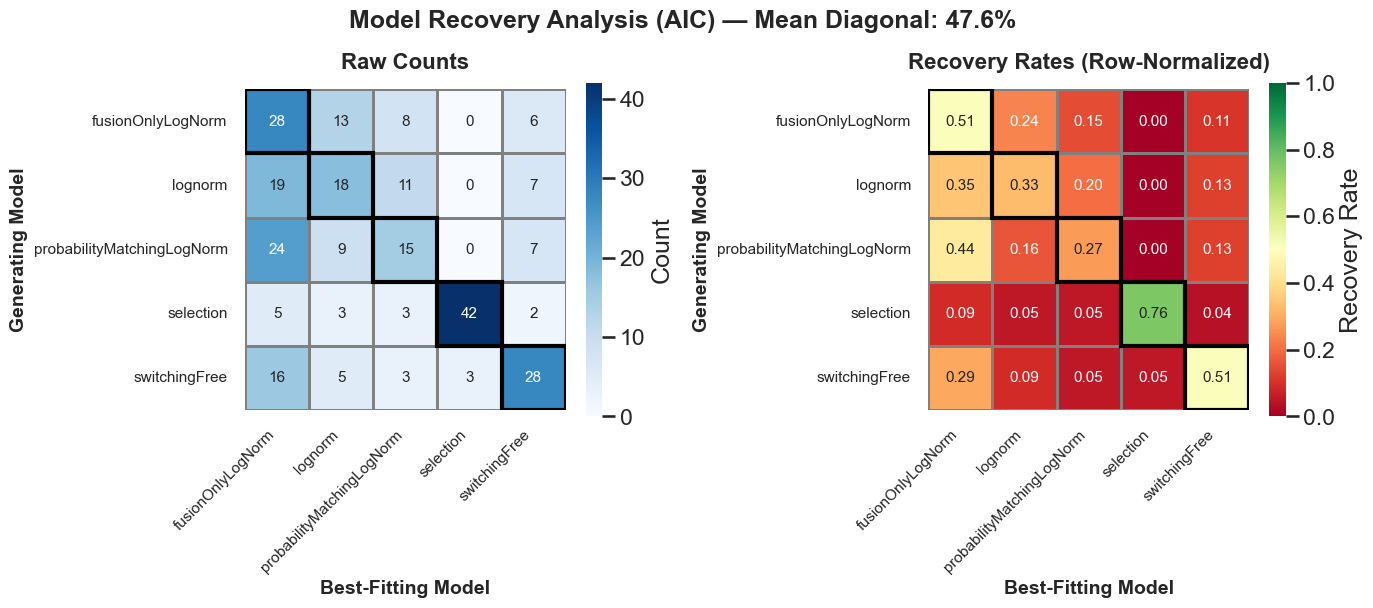


MODEL RECOVERY SUMMARY (AIC)
fusionOnlyLogNorm        :  50.9% correctly recovered (n=55)
lognorm                  :  32.7% correctly recovered (n=55)
probabilityMatchingLogNorm:  27.3% correctly recovered (n=55)
selection                :  76.4% correctly recovered (n=55)
switchingFree            :  50.9% correctly recovered (n=55)

Mean diagonal recovery: 47.6%


In [33]:
# Plot Model Recovery Confusion Matrix
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_theme(context="talk", style="white")

def plot_model_recovery_matrix(model_recovery_results, criterion='aic', annotate=True, 
                                cmap_counts="Blues", cmap_props="RdYlGn"):
    """
    Clean, publication-ready confusion matrix for model recovery.

    Args:
        model_recovery_results: Output from run_model_recovery.
        criterion: Model selection metric to summarize ('aic' or 'bic').
        annotate: Whether to write values on each cell.
        cmap_counts: Matplotlib colormap for raw counts heatmap.
        cmap_props: Matplotlib colormap for proportion heatmap.
    """
    if len(model_recovery_results) == 0:
        print("No model recovery results to plot!")
        return None

    generating_models = sorted(set(r['generating_model'] for r in model_recovery_results))

    # Build unified list of fitted models across all iterations
    fitted_models = sorted({
        model
        for result in model_recovery_results
        for iteration in result.get('iterations', [])
        for model in iteration.get('model_fits', {}).keys()
    })

    if not fitted_models:
        print("No fitted models found in the recovery results.")
        return None

    confusion_counts = np.zeros((len(generating_models), len(fitted_models)))

    for result in model_recovery_results:
        gen_idx = generating_models.index(result['generating_model'])
        counts_key = f'best_model_counts_{criterion}'

        if counts_key in result:
            for fit_model, count in result[counts_key].items():
                if fit_model in fitted_models:
                    fit_idx = fitted_models.index(fit_model)
                    confusion_counts[gen_idx, fit_idx] += count

    # Normalize per generating model
    row_totals = confusion_counts.sum(axis=1, keepdims=True)
    safe_totals = row_totals.copy()
    safe_totals[safe_totals == 0] = 1
    confusion_props = confusion_counts / safe_totals

    # Calculate diagonal recovery rates
    diag_rates = []
    for i, gen_model in enumerate(generating_models):
        if gen_model in fitted_models:
            j = fitted_models.index(gen_model)
            diag_rates.append(confusion_props[i, j])
    
    mean_recovery = np.mean(diag_rates) if diag_rates else 0

    # Create figure with clean layout
    fig, (count_ax, prop_ax) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Raw counts heatmap
    sns.heatmap(
        confusion_counts,
        ax=count_ax,
        annot=annotate,
        fmt=".0f",
        cmap=cmap_counts,
        cbar_kws={"label": "Count"},
        linewidths=1,
        linecolor="gray",
        square=True,
        xticklabels=fitted_models,
        yticklabels=generating_models,
        annot_kws={"fontsize": 11}
    )
    count_ax.set_xlabel("Best-Fitting Model", fontsize=14, fontweight='bold')
    count_ax.set_ylabel("Generating Model", fontsize=14, fontweight='bold')
    count_ax.set_title("Raw Counts", fontsize=16, fontweight='bold', pad=15)
    count_ax.set_xticklabels(count_ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
    count_ax.set_yticklabels(count_ax.get_yticklabels(), rotation=0, fontsize=11)

    # Proportions heatmap
    sns.heatmap(
        confusion_props,
        ax=prop_ax,
        annot=annotate,
        fmt=".2f",
        cmap=cmap_props,
        vmin=0,
        vmax=1,
        cbar_kws={"label": "Recovery Rate"},
        linewidths=1,
        linecolor="gray",
        square=True,
        xticklabels=fitted_models,
        yticklabels=generating_models,
        annot_kws={"fontsize": 11}
    )
    prop_ax.set_xlabel("Best-Fitting Model", fontsize=14, fontweight='bold')
    prop_ax.set_ylabel("Generating Model", fontsize=14, fontweight='bold')
    prop_ax.set_title("Recovery Rates (Row-Normalized)", fontsize=16, fontweight='bold', pad=15)
    prop_ax.set_xticklabels(prop_ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
    prop_ax.set_yticklabels(prop_ax.get_yticklabels(), rotation=0, fontsize=11)

    # Highlight diagonal on both plots
    for ax in (count_ax, prop_ax):
        for i, gen_model in enumerate(generating_models):
            if gen_model in fitted_models:
                j = fitted_models.index(gen_model)
                ax.add_patch(plt.Rectangle(
                    (j, i), 1, 1,
                    fill=False,
                    edgecolor="black",
                    linewidth=3
                ))

    # Main title with key statistic
    fig.suptitle(
        f"Model Recovery Analysis ({criterion.upper()}) — Mean Diagonal: {mean_recovery*100:.1f}%",
        fontsize=18,
        fontweight="bold",
        y=0.98
    )
    
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\n" + "="*70)
    print(f"MODEL RECOVERY SUMMARY ({criterion.upper()})")
    print("="*70)
    for i, gen_model in enumerate(generating_models):
        if gen_model in fitted_models:
            j = fitted_models.index(gen_model)
            rate = confusion_props[i, j]
            n_total = int(confusion_counts[i, :].sum())
            print(f"{gen_model:25s}: {rate*100:5.1f}% correctly recovered (n={n_total})")
    print(f"\nMean diagonal recovery: {mean_recovery*100:.1f}%")
    print("="*70)

    return confusion_props, generating_models, fitted_models

# Plot if results exist
if len(model_recovery_results) > 0:
    confusion_matrix, gen_models, fit_models = plot_model_recovery_matrix(
        model_recovery_results, criterion='aic'
    )
else:
    print("No model recovery results yet. Run the model recovery analysis first.")

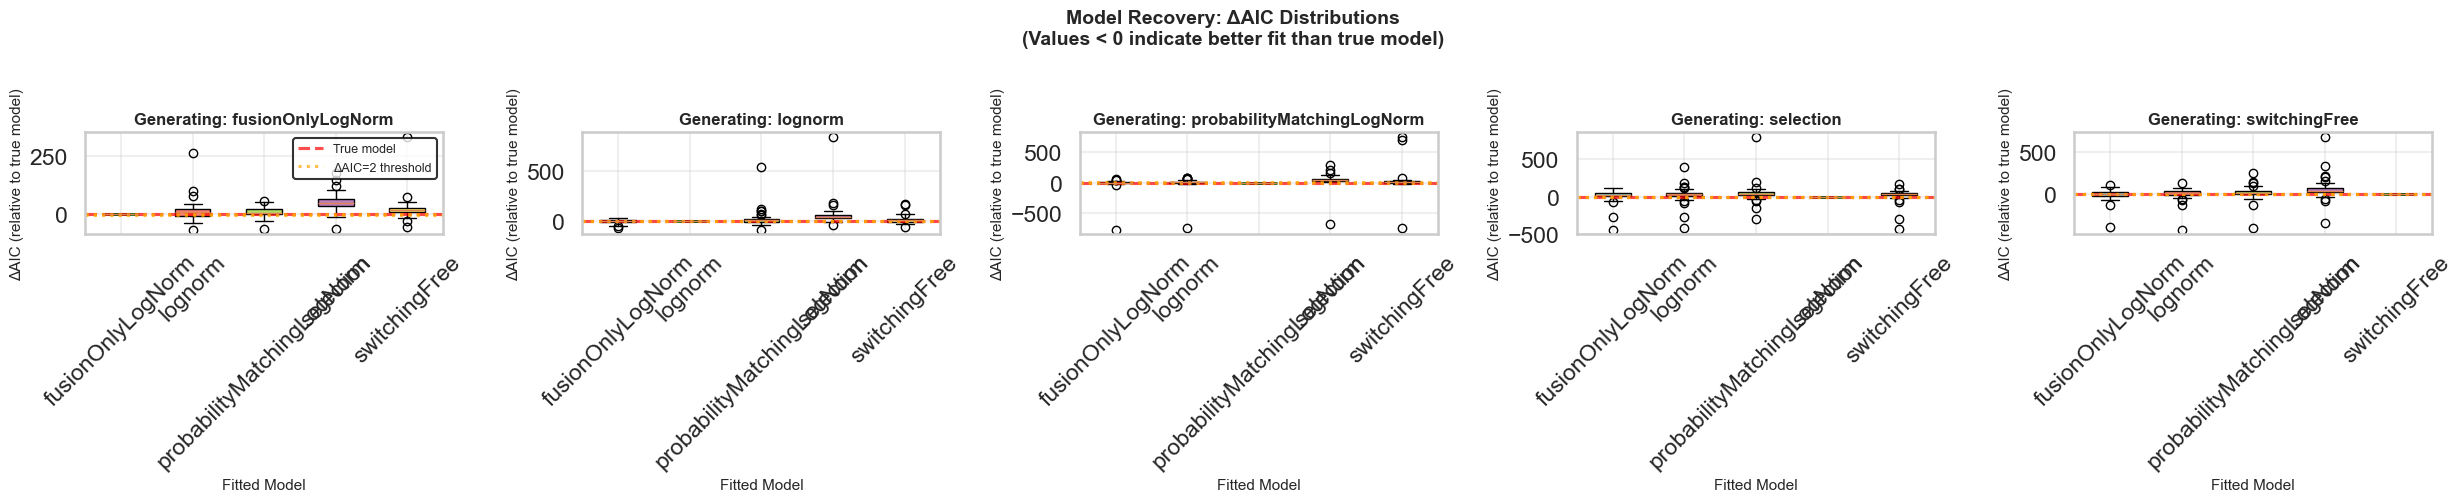


MODEL DISCRIMINABILITY ANALYSIS

For each generating model, how often do competing models fit BETTER (ΔAIC < -2)?
----------------------------------------------------------------------

Generating model: fusionOnlyLogNorm
  lognorm fits better 80.0% of the time
  probabilityMatchingLogNorm fits better 60.0% of the time
  selection fits better 20.0% of the time
  switchingFree fits better 40.0% of the time
  lognorm fits better 20.0% of the time
  probabilityMatchingLogNorm fits better 40.0% of the time
  switchingFree fits better 40.0% of the time
  lognorm fits better 40.0% of the time
  probabilityMatchingLogNorm fits better 40.0% of the time
  switchingFree fits better 20.0% of the time
  lognorm fits better 20.0% of the time
  lognorm fits better 80.0% of the time
  probabilityMatchingLogNorm fits better 20.0% of the time
  switchingFree fits better 20.0% of the time
  lognorm fits better 20.0% of the time
  switchingFree fits better 20.0% of the time
  lognorm fits better 40.0% o

In [ ]:
# Additional Model Recovery Metrics: ΔAIC distributions and model discriminability
import seaborn as sns
sns.set_theme(context="talk", style="whitegrid")

def plot_model_recovery_details(model_recovery_results, criterion='aic', highlight_threshold=2.0):
    """
    Publication-ready diagnostics showing ΔAIC/ΔBIC distributions and discriminability stats.

    Args:
        model_recovery_results: Output from run_model_recovery.
        criterion: 'aic' or 'bic' – determines which information criterion to compare.
        highlight_threshold: Threshold for substantial evidence (default Δ=2).
    """
    if len(model_recovery_results) == 0:
        print("No model recovery results to analyze!")
        return

    metric_key = 'AIC' if criterion.lower() == 'aic' else 'BIC'

    generating_models = sorted(set(r['generating_model'] for r in model_recovery_results))

    # Determine fitted models from all iterations
    fitted_models = sorted({
        model
        for result in model_recovery_results
        for iteration in result.get('iterations', [])
        for model in iteration.get('model_fits', {}).keys()
    })

    if not fitted_models:
        print("No fitted models available to summarize.")
        return

    # Collect ΔIC values across all iterations
    records = []
    for result in model_recovery_results:
        gen_model = result['generating_model']
        for iteration in result['iterations']:
            model_fits = iteration['model_fits']
            if gen_model not in model_fits:
                continue
            true_ic = model_fits[gen_model][metric_key]
            for fit_model, fit_info in model_fits.items():
                delta_ic = fit_info[metric_key] - true_ic
                records.append({
                    'generating_model': gen_model,
                    'fit_model': fit_model,
                    'delta_ic': delta_ic
                })

    if not records:
        print("No ΔIC values could be computed. Ensure iterations contain model fits.")
        return

    df = pd.DataFrame(records)

    palette = sns.color_palette("tab20", len(fitted_models))
    palette_map = dict(zip(fitted_models, palette))

    fig, axes = plt.subplots(
        1,
        len(generating_models),
        figsize=(5.2 * len(generating_models), 5),
        sharey=True,
        squeeze=False
    )
    axes = axes.flatten()

    for idx, gen_model in enumerate(generating_models):
        ax = axes[idx]
        subset = df[df['generating_model'] == gen_model]
        if subset.empty:
            ax.set_title(f"Generating: {gen_model}\n(no iterations)")
            ax.set_axis_off()
            continue

        ordered_palette = [palette_map[m] for m in fitted_models]
        sns.boxplot(
            data=subset,
            x='fit_model',
            y='delta_ic',
            order=fitted_models,
            palette=ordered_palette,
            whis=[10, 90],
            fliersize=0,
            width=0.55,
            ax=ax
        )
        sns.stripplot(
            data=subset,
            x='fit_model',
            y='delta_ic',
            order=fitted_models,
            ax=ax,
            color='black',
            size=3,
            alpha=0.35,
            jitter=0.18
        )

        ax.axhline(0, color='firebrick', linestyle='--', linewidth=1.4, label='True model fit')
        ax.axhline(highlight_threshold, color='gray', linestyle=':', linewidth=1.2)
        ax.axhline(-highlight_threshold, color='gray', linestyle=':', linewidth=1.2)
        ax.set_title(f"Generating: {gen_model}", fontweight='bold')
        ax.set_xlabel("Fitted Model")
        if idx == 0:
            ax.set_ylabel(f"Δ{metric_key} (fit - true)")
        else:
            ax.set_ylabel("")
        ax.tick_params(axis='x', rotation=40, ha='right')

        if gen_model in fitted_models:
            true_idx = fitted_models.index(gen_model)
            tick_labels = ax.get_xticklabels()
            if true_idx < len(tick_labels):
                tick_labels[true_idx].set_fontweight('bold')
                tick_labels[true_idx].set_color('darkgreen')

    fig.suptitle(f"Model Recovery Δ{metric_key} Distributions", fontsize=18, fontweight='bold', y=1.03)
    fig.tight_layout()
    plt.show()

    # Summarize discriminability statistics
    summary = (
        df.assign(better=(df['delta_ic'] < -highlight_threshold))
          .groupby(['generating_model', 'fit_model'])
          .agg(
              median_delta=('delta_ic', 'median'),
              mean_delta=('delta_ic', 'mean'),
              pct_better=('better', 'mean'),
              n=('delta_ic', 'size')
          )
          .reset_index()
    )
    summary['pct_better'] = summary['pct_better'] * 100

    column_formats = {
        'median_delta': "{:.2f}",
        'mean_delta': "{:.2f}",
        'pct_better': "{:.1f}",
        'n': "{:.0f}"
    }
    safe_display_df(
        summary.rename(columns={
            'generating_model': 'Generating Model',
            'fit_model': 'Fitted Model',
            'median_delta': f"Median Δ{metric_key}",
            'mean_delta': f"Mean Δ{metric_key}",
            'pct_better': f"% Better than true (Δ<{highlight_threshold})",
            'n': 'Samples'
        }),
        fmt=column_formats,
        gradient_subset=[f"Median Δ{metric_key}", f"% Better than true (Δ<{highlight_threshold})"],
        cmap='YlOrRd'
    )

    print("\n" + "="*70)
    print(f"MODEL DISCRIMINABILITY ANALYSIS ({metric_key})")
    print("="*70)
    for _, row in summary.iterrows():
        if row['fit_model'] == row['generating_model']:
            continue
        if row['pct_better'] >= 10:
            print(
                f"{row['fit_model']} beats true {row['generating_model']} in "
                f"{row['pct_better']:.1f}% of simulations (n={int(row['n'])})"
            )

# Plot detailed metrics if results exist
if len(model_recovery_results) > 0:
    plot_model_recovery_details(model_recovery_results)
else:
    print("Run model recovery analysis first to see detailed metrics.")